#### Grayscale images

An image in which all the pixels are shades of gray ranging from black to white is called a "grayscale image". Since there are only shades of grey, a grayscale image can be encoded by the brightness of every pixel. Representing the brightness as a number between 0 and 1, where 0 is totally black and 1 is totally white, the image can be represented as 2-dimensional array of numbers.

if the entries of this array are non-negative, NMF can be used to learn the parts of the images. If NMF is applied to a collection of images, then the NMF components will represent patterns that frequently occur in the images. 

#### Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images from an LCD display into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("lcd-digits.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
samples = df.to_numpy() 

A collection of grayscale images of the same size can be encoded as a 2-dimensional array, in which each row represents an image as a flattened array, and each column represents a pixel. 

Viewing the images as samples, and the pixels as features, we see that the data is arranged similarly to the word frequency array.

In [5]:
samples

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
samples.shape ### 100-->>100 images, 104--->> image size(13*8)

(100, 104)

You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. 

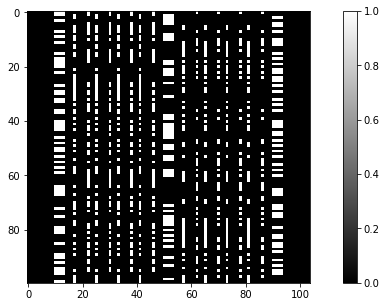

In [21]:
# Use plt.imshow to display bitmap
plt.figure(figsize=(12,5))
plt.imshow(samples, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

These 2-dimensional arrays of numbers can then be flattened by enumerating the entries. For instance, we could read-off the values row-by-row, from left-to-right and top to bottom.

In [6]:
digit = samples[0,:]
digit

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

The grayscale image is now represented by a flat array of non-negative numbers.

In [7]:
digit.shape

(104,)

#### Visualizing samples

It's difficult to visualize an image by just looking at the flattened array. To recover the image, use the reshape method of the sample, specifying the dimensions of the original image as a tuple. This yields the 2-dimensional array of pixel brightnesses. 

In [9]:
bitmap = digit.reshape(13,8)

To display the corresponding image, import pyplot, and pass the 2-dimensional array to the plt dot imshow function.

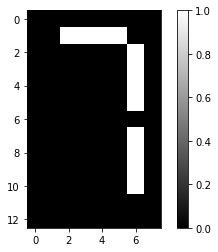

In [10]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

#### NMF learns the parts of images

In [11]:
# Import NMF
from sklearn.decomposition import NMF

Create an NMF instance called model with 7 components. (7 is the number of cells in an LED display)

In [12]:
# Create an NMF model: model
model = NMF(n_components = 7)

In [13]:
# Apply fit_transform to samples: features
features = model.fit_transform(samples)

C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [26]:
model.components_.shape

(7, 104)

In [33]:
for component in model.components_:
    print(component.shape)

(104,)
(104,)
(104,)
(104,)
(104,)
(104,)
(104,)


We'll create a helper function show_as_image() that displays the image encoded by any 1D array:

In [29]:
def show_as_image(sample):
    bitmap = sample.reshape(13, 8)
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

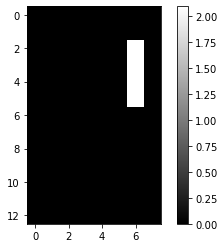

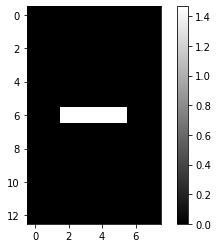

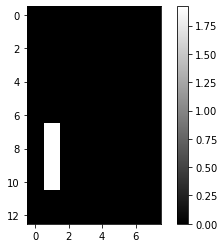

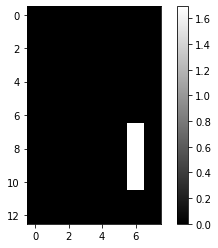

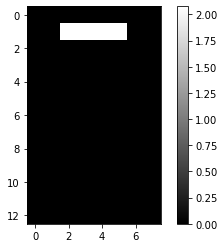

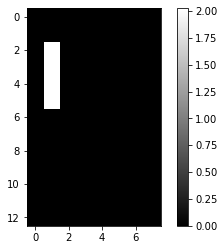

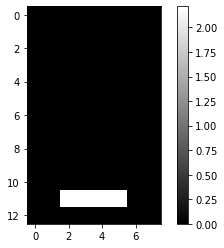

In [30]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [31]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

In [32]:
# Print digit_features
print(digit_features)

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37546142e-16]
